In [3]:
# 이전에 사용했던 데이터 준비
import matplotlib.pyplot as plt

# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 도미와 빙어 데이터 결합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 2차원 리스트 만들기(리스트 내포)
fish_input = [[l, w] for l, w in zip(length, weight)]
fish_target = [1]*35 + [0]*14

## 데이터 다루기

In [4]:
# 훈련 세트와 테스트 세트 분리
train_input = fish_input[:35] # 전부 도미
test_data = fish_input[35:] # 전부 빙어

train_target = fish_target[:35] # 전부 도미
test_target = fish_target[35:] # 전부 빙어

# 평가하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_data, test_target)

0.0

평가 점수 0.0 이 반환되며 `샘플링 편향` 이 발생

### 샘플링 편향이란?
통계나 연구에서 표본을 선택할 때 발생하는 문제로, 선택 표본이 전체 집단을 제대로 대표하지 못하는 상황

쉬운 예시:
- 키 조사: 어떤 나라 사람들의 평균 키를 조사하고싶은데 농구 선수들만 대상으로 조사하면 평균 키가 높게 나옴
- 의견 조사: 새로운 음식의 출시 반응을 알고 싶은데 음식 관련 블로거들만 대상으로 조사하면 일반 소비자들과 다를 수 있음

이것의 문제는 대표성이 부족하고, 중요한 특성을 학습하지 못해 정보의 손실이 일어나고, 일반화 능력이 저하됨

즉, ***과소적합*** 이 발생하게 되는 것

아래는 그것을 방지하기 위해 표본 데이터를 섞어보는 예제이다.


0.3854165025399161
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


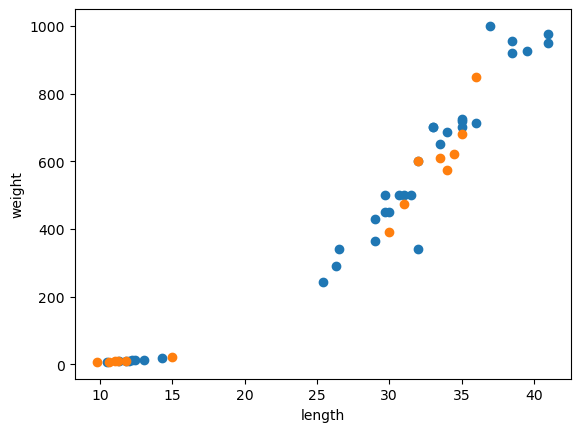

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fish_input_arr = np.array(fish_input)
fish_target_arr = np.array(fish_target)

np.random.seed(42) # random seed 추가(시드가 고정되어있기 때문에 random 관련 함수가 항상 같은 순서나 값으로 배열됨)

index = np.arange(49) # 0~48 49개의 순차적 index 데이터 생성
np.random.shuffle(index) # index 데이터 순서 섞기

print(np.random.sample())
print(index)

# input
train_input = fish_input_arr[index[:35]]
test_input = fish_input_arr[index[35:]]

# target
train_target = fish_target_arr[index[:35]]
test_target = fish_target_arr[index[35:]]

# 전처리된 데이터 확인
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 데이터 스케일 문제
특성 데이터의 기준 값이 서로 다르기 때문에 발생하는 문제.

도미, 빙어 데이터: http://bit.ly/bream_smelt

In [6]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_data) # 2차원 배열
print(fish_target) # 1차원 배열

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### Scikit-learn 으로 데이터 나누기
- train_test_split()
    - 리스트를 훈련 세트와 테스트 세트로 자동으로 분리
    - stratify
        - 무작위 데이터를 일정 비율로 섞이도록 설정
        - target 데이터를 전달

0.0


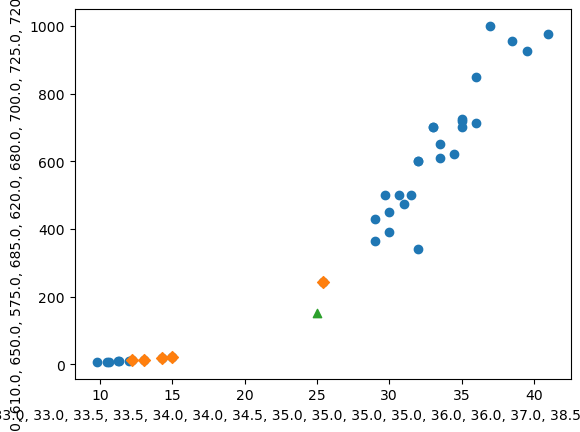

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
print(kn.predict([[25, 150]])[0]) # 0이 반환되었다는건 이진 분류에서 0이 정답인 '빙어'로 분류되었다는 것

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # 훈련 데이터 중 목표 데이터 [25,150]을 분류하는 데에 사용된 데이터 (마름모)
plt.scatter(25, 150, marker='^') # 목표 데이터 (세모)
plt.xlabel(length)
plt.ylabel(weight)
plt.show()

### 강제 일원화의 문제
x축과 y축의 단위가 달라서 발생하는 문제.
- xlim() : x축 단위를 변경하는 메서드

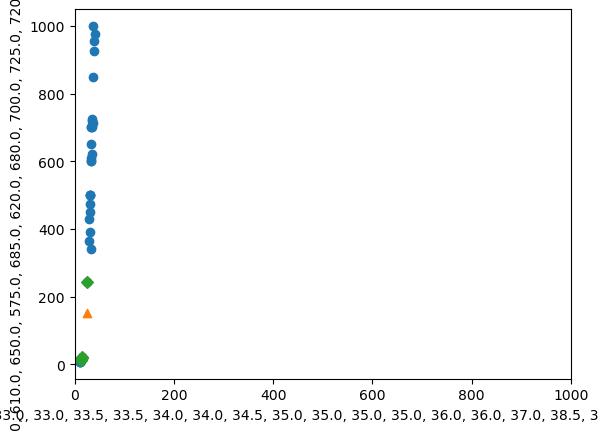

In [11]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlim((0, 1000)) # xlim() 메서드로 단위를 변경함
plt.xlabel(length)
plt.ylabel(weight)
plt.show()

### 기준값으로 변경(데이터 전처리)
- 두 특성 스케일을 기준값으로 변경
- 표준 점수(Standard Score)
    - 각 특성값이 0에서 표준 편차의 몇 배만큼 떨어져있는지를 표시 -n ~ 0 ~ n
    - numpy 평균:mean(), 표준편차:std() 메서드 이용
        - axis : 0=세로축, 1=가로축
- 샘플 데이터도 동일한 기준값으로 변경
- numpy.std() 함수의 표준 편차 계산 방법
    1. 평균 계산: mean = np.mean(data)
	2.	편차 제곱의 평균 계산: variance = np.mean((data - mean)**2)
	3.	제곱근 계산: std_dev = np.sqrt(variance)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


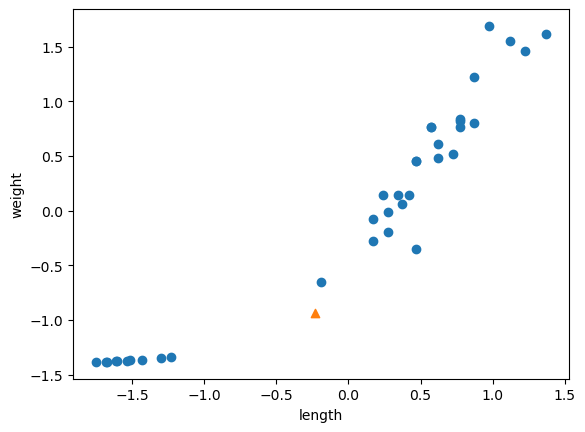

score:  1.0
predict:  [1.]


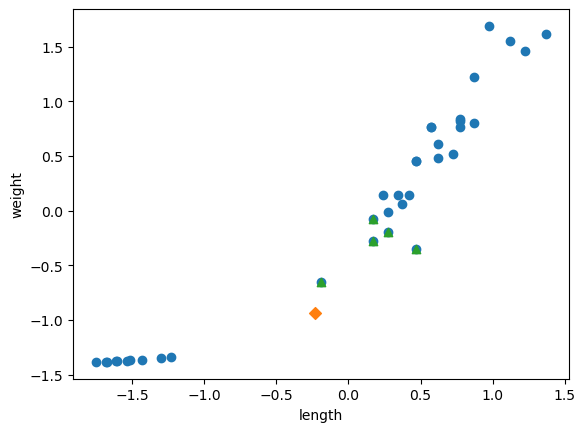

In [19]:
mean = np.mean(train_input, axis=0) # 평균값 생성
std = np.std(train_input, axis=0) # 표준 편차 생성

print(mean, std)

# 훈련 데이터의 기준
# train_scaled: 표준 편차로 Scale 조정된 훈련 데이터
train_scaled = (train_input - mean) / std

# 샘플 데이터도 기준값 적용
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 표준 편차가 적용된 데이터를 이용한 모델 훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
print('score: ', kn.score(test_scaled, test_target))
print('predict: ', kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='D')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()